# Pre-processing Steps

<ol>1. Filling the missing values</ol>
<ol>2. Converting categories to numbers</ol>
<ol>3. Bring all the variables in range 0 to 1</ol>

In [1]:
# importing required libraries
import pandas as pd

In [4]:
# reading the loan prediction data
data = pd.read_csv('loan_data.csv')

In [5]:
# looking at the first five rows of the data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
# shape of the data
data.shape

(614, 13)

In [8]:
# checking missing values in the data
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# data types of the variables
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## 1. Filling the missing values

### Categorical Data: Mode

In [9]:
# filling missing values of categorical variables with mode

data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)

data['Married'].fillna(data['Married'].mode()[0], inplace=True)

data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)

data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)

data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

### Continuous Data: Mean

In [10]:
# filling missing values of continuous variables with mean
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)

In [11]:
# checking missing values after imputation
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## 2. Converting categories to numbers

In [12]:
# converting the categories into numbers using map function
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Married'] = data['Married'].map({'No': 0, 'Yes': 1})
data['Dependents'] = data['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
data['Education'] = data['Education'].map({'Graduate': 1, 'Not Graduate': 0})
data['Self_Employed'] = data['Self_Employed'].map({'No': 0, 'Yes': 1})
data['Property_Area'] = data['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
data['Loan_Status'] = data['Loan_Status'].map({'N': 0, 'Y': 1})

In [13]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


## 3. Bringing all the variables in range 0 to 1

<img src='https://drive.google.com/uc?id=1Z7wN2BE8CDSYIJly5l0K9uqYdj9WUo3f'>

In [14]:
# bringing variables in the range 0 to 1
data['Dependents']=(data['Dependents']-data['Dependents'].min())/(data['Dependents'].max()-data['Dependents'].min())

In [15]:
# applying for loop to bring all the variables in range 0 to 1

for i in data.columns[1:]:
    data[i] = (data[i] - data[i].min()) / (data[i].max() - data[i].min())

In [16]:
# again looking at first five rows of pre-processed data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [18]:
# saving the pre-processed data
data.to_csv('loan_prediction_data_preprocessed.csv', index=False)

### Data Preparation for model

In [20]:
# removing the loan_ID since these are just the unique values
data = data.drop('Loan_ID', axis=1)

In [22]:
# separating the independent and dependent variables

# storing all the independent variables as X
X = data.drop('Loan_Status', axis=1)

# storing the dependent variable as y
y = data['Loan_Status']
# shape of independent and dependent variables
X.shape, y.shape

((614, 11), (614,))

In [25]:
#Target Label distribution
y.value_counts(normalize=True)

1.0    0.687296
0.0    0.312704
Name: Loan_Status, dtype: float64

In [52]:
# Creating training and validation set

# stratify will make sure that the distribution of classes in train and validation set it similar
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=data['Loan_Status'],random_state=10,test_size=0.2)

### Define Model Architecture

<img src='https://drive.google.com/uc?id=16X6De2hua1XJBe3dfmUUeGTgP6PbXEpc'>

#### Input Layer = 11 Neurons (Number of Features or dependent Variable),
#### Hidden Layers = 2,
#### Hidden Layers_1 = 10 Neurons,
#### Hidden Layers_2 = 5 Neurons,
#### Output Layer = 1 Neuron (As Classification problem)

In [53]:
# importing the sequential model,layers
from keras.models import Sequential
from keras.layers import InputLayer, Dense

In [54]:
# defining input neurons
input_neurons = X_train.shape[1]

# define hidden layers and neuron in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5

# define number of output neurons
output_neurons = 1

In [55]:
# defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

In [56]:
# summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                120       
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


#### Parameter Calculation
* Input variable = 11
* Bias(1 for each neuron) = 10 * 1
* Hidden1 (10 Neurons) +Input = 11 * 10 = 110  + bias(10) = 120
* Hidden2 (5 Neurons) + hidden_1 =  5 *10 + bias (5) = 55
* Output_layer + hidden2 = 5 * 1

Total Parameter = 120 + 55 + 6 = 181


### Model Compilation

In [57]:
# loss as binary_crossentropy, since we have binary classification problem
# defining the optimizer as adam
# Evaluation metric as accuracy

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

### Model Training

In [58]:
# training the model
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=60)

# passing the independent and dependent features for training set for training the model

# validation data will be evaluated at the end of each epoch

# setting the epochs as 50

# storing the trained model in model_history variable which will be used to visualize the training process


Epoch 1/60
16/16 [==============================] - 2s 17ms/step - loss: 0.6557 - accuracy: 0.6415 - val_loss: 0.6474 - val_accuracy: 0.6667
Epoch 2/60
16/16 [==============================] - 0s 7ms/step - loss: 0.6286 - accuracy: 0.6904 - val_loss: 0.6231 - val_accuracy: 0.6992
Epoch 3/60
16/16 [==============================] - 0s 6ms/step - loss: 0.6083 - accuracy: 0.6925 - val_loss: 0.6078 - val_accuracy: 0.6911
Epoch 4/60
16/16 [==============================] - 0s 6ms/step - loss: 0.5962 - accuracy: 0.6864 - val_loss: 0.5976 - val_accuracy: 0.6911
Epoch 5/60
16/16 [==============================] - 0s 7ms/step - loss: 0.5886 - accuracy: 0.6864 - val_loss: 0.5910 - val_accuracy: 0.6911
Epoch 6/60
16/16 [==============================] - 0s 6ms/step - loss: 0.5830 - accuracy: 0.6864 - val_loss: 0.5864 - val_accuracy: 0.6911
Epoch 7/60
16/16 [==============================] - 0s 6ms/step - loss: 0.5787 - accuracy: 0.6864 - val_loss: 0.5812 - val_accuracy: 0.6911
Epoch 8/60
16/16 [=

### Evaluating Performance

In [59]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [60]:
# getting predictions for the validation set
prediction = model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


In [61]:
prediction = np.where(prediction > 0.5, 1,0)

In [62]:
# calculating the accuracy on validation set
accuracy_score(y_test, prediction)

0.8130081300813008

### Visualization

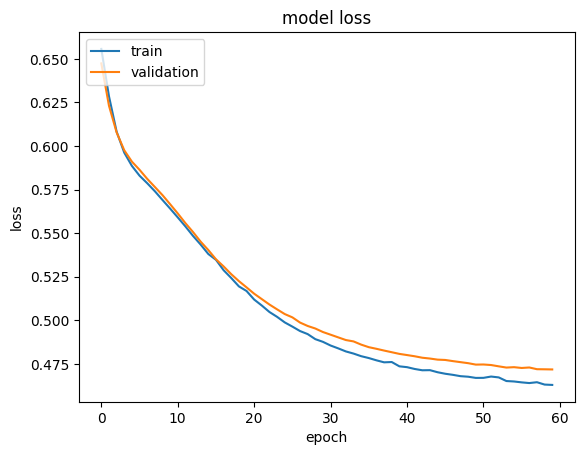

In [63]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

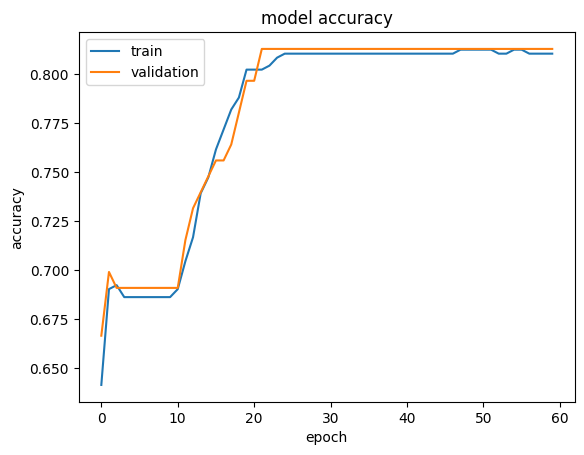

In [64]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

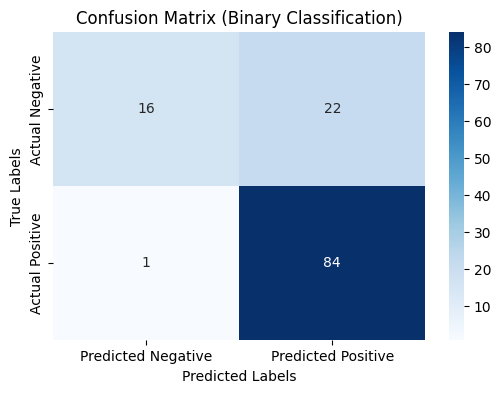

In [68]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns


# Create a confusion matrix
cm = confusion_matrix(y_test, prediction)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Binary Classification)')
plt.show()


In [70]:
# Generate classification report
report = classification_report(y_test,prediction, target_names=["Negative", "Positive"])

# Print the classification report
print(report)

              precision    recall  f1-score   support

    Negative       0.94      0.42      0.58        38
    Positive       0.79      0.99      0.88        85

    accuracy                           0.81       123
   macro avg       0.87      0.70      0.73       123
weighted avg       0.84      0.81      0.79       123



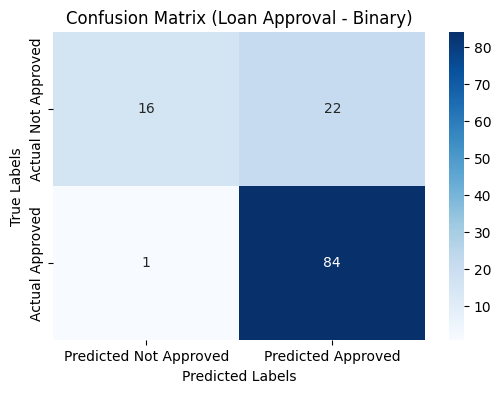

              precision    recall  f1-score   support

Not Approved       0.94      0.42      0.58        38
    Approved       0.79      0.99      0.88        85

    accuracy                           0.81       123
   macro avg       0.87      0.70      0.73       123
weighted avg       0.84      0.81      0.79       123



In [71]:
# Create a confusion matrix
cm = confusion_matrix(y_test, prediction)

# Generate classification report
report = classification_report(y_test, prediction, target_names=["Not Approved", "Approved"])

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Not Approved', 'Predicted Approved'],
            yticklabels=['Actual Not Approved', 'Actual Approved'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Loan Approval - Binary)')
plt.show()

# Print the classification report
print(report)
